# 1.1 The Lotka–Volterra equations

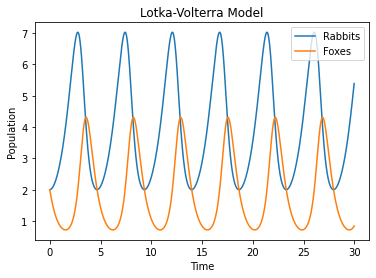

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(x,t,tau,derivsRK,param):
    """Runge-Kutta integrator (4th order)
       Input arguments -
        x = current value of dependent variable
        t = independent variable (usually time)
        tau = step size (usually timestep)
        derivsRK = right hand side of the ODE; derivsRK is the
                  name of the function which returns dx/dt
                  Calling format derivsRK (x,t,param).
        param = extra parameters passed to derivsRK
       Output arguments -
        xout = new value of x after a step of size tau
    """
    
    half_tau = 0.5*tau
    F1 = derivsRK(x,t,param)  
    t_half = t + half_tau
    xtemp = x + half_tau*F1
    F2 = derivsRK(xtemp,t_half,param)  
    xtemp = x + half_tau*F2
    F3 = derivsRK(xtemp,t_half,param)
    t_full = t + tau
    xtemp = x + tau*F3
    F4 = derivsRK(xtemp,t_full,param)
    xout = x + tau/6.*(F1 + F4 + 2.*(F2+F3))
    return xout

# Lotka-Volterra model equations
def lotka_volterra(x, t, param):
    alpha, beta, gamma, delta = param
    dxdt = alpha * x[0] - beta * x[0] * x[1]
    dydt = gamma * x[0] * x[1] - delta * x[1]
    return np.array([dxdt, dydt])

# Parameters and initial conditions
params = [1.0, 0.5, 0.5, 2.0]  # alpha, beta, gamma, delta
x0 = np.array([2.0, 2.0])  # Initial populations of rabbits and foxes
t = 0  # Start time
tau = 0.01  # Time step
t_end = 30

# Arrays for storing solutions
times = np.arange(t, t_end, tau)
solutions = np.empty((len(times), 2))
solutions[0] = x0

# Solve using rk4
for i in range(1, len(times)):
    solutions[i] = rk4(solutions[i-1], times[i-1], tau, lotka_volterra, params)

# Plotting
plt.plot(times, solutions[:, 0], label='Rabbits')
plt.plot(times, solutions[:, 1], label='Foxes')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Lotka-Volterra Model')
plt.show()

In [21]:
"""#2 
In the Lotka-Volterra system the rabbit population grows, providing more food for foxes, which leads to an increase in the fox 
population. This increase in predators then causes a decline in the rabbit population, followed by a decrease in 
the fox population due to reduced food availability. This cycle repeats, demonstrating the interconnectedness and 
dependency of predator and prey populations within an ecosystem."""

'#2 \nIn the Lotka-Volterra system the rabbit population grows, providing more food for foxes, which leads to an increase in the fox \npopulation. This increase in predators then causes a decline in the rabbit population, followed by a decrease in \nthe fox population due to reduced food availability. This cycle repeats, demonstrating the interconnectedness and \ndependency of predator and prey populations within an ecosystem.'

# 1.2 The Lorenz equations

In [16]:
#1
import numpy as np
from rk4 import rk4

def rka(x,t,tau,err,derivsRK,param):
    """Adaptive Runge-Kutta routine
       Inputs
        x          Current value of the dependent variable
        t          Independent variable (usually time)
        tau        Step size (usually time step)
        err        Desired fractional local truncation error
        derivsRK   Right hand side of the ODE; derivsRK is the
                   name of the function which returns dx/dt
                   Calling format derivsRK (x,t,param).
        param      Extra parameters passed to derivsRK
       Outputs
        xSmall     New value of the dependent variable
        t          New value of the independent variable
        tau        Suggested step size for next call to rka
    """
    
    #* Set initial variables
    tSave, xSave = t, x        # Save initial values
    safe1, safe2 = 0.9, 4.0    # Safety factors
    eps = 1.e-15

    #* Loop over maximum number of attempts to satisfy error bound
    xTemp = np.empty(len(x))
    xSmall = np.empty(len(x)); xBig = np.empty(len(x))
    maxTry = 100
    for iTry in range(maxTry):

        #* Take the two small time steps
        half_tau = 0.5 * tau
        xTemp = rk4(xSave,tSave,half_tau,derivsRK,param)
        t = tSave + half_tau
        xSmall = rk4(xTemp,t,half_tau,derivsRK,param)
  
        #* Take the single big time step
        t = tSave + tau
        xBig = rk4(xSave,tSave,tau,derivsRK,param)
  
        #* Compute the estimated truncation error
        scale = err * (abs(xSmall) + abs(xBig))/2.
        xDiff = xSmall - xBig
        errorRatio = np.max( np.absolute(xDiff) / (scale + eps) )
  
        #* Estimate new tau value (including safety factors)
        tau_old = tau
        tau = safe1*tau_old*errorRatio**(-0.20)
        tau = max(tau, tau_old/safe2)
        tau = min(tau, safe2*tau_old)
  
        #* If error is acceptable, return computed values
        if errorRatio < 1 :
            return xSmall, t, tau

    #* Issue error message if error bound never satisfied
    print('ERROR: Adaptive Runge-Kutta routine failed')
    return xSmall, t, tau

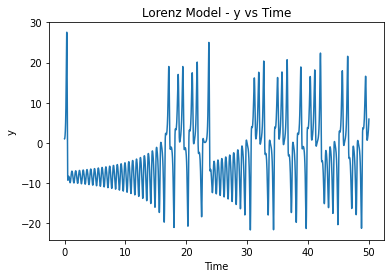

In [17]:
# Lorenz system equations
def lorenz(x, t, param):
    sigma, rho, beta = param
    dxdt = sigma * (x[1] - x[0])
    dydt = x[0] * (rho - x[2]) - x[1]
    dzdt = x[0] * x[1] - beta * x[2]
    return np.array([dxdt, dydt, dzdt])

# Initial conditions and parameters for Lorenz
x0 = np.array([0.0, 1.0, 0.0])
params = [10.0, 28.0, 8/3]  # sigma, rho, beta
t = 0
tau = 0.01  # Initial time step
err = 1e-5  # Desired fractional local truncation error
t_end = 50

# Solving the Lorenz system using rka
times = [t]
solutions = [x0]
while t < t_end:
    x0, t, tau = rka(x0, t, tau, err, lorenz, params)
    times.append(t)
    solutions.append(x0)

solutions = np.array(solutions)

# Plotting y vs. time
plt.figure()
plt.plot(times, solutions[:, 1])
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Lorenz Model - y vs Time')
plt.show()

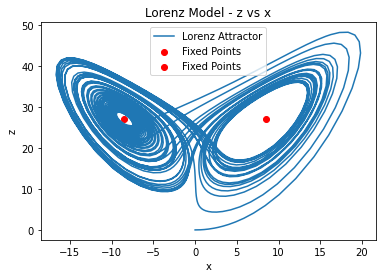

In [13]:
#2
# Plot z vs. x including fixed points
plt.figure()
plt.plot(solutions[:, 0], solutions[:, 2], label='Lorenz Attractor')
# Fixed points
for sign in [-1, 1]:
    fixed_x = sign * np.sqrt(params[2] * (params[1] - 1))
    fixed_z = params[1] - 1
    plt.scatter(fixed_x, fixed_z, color='red', label='Fixed Points')
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.title('Lorenz Model - z vs x')
plt.show()

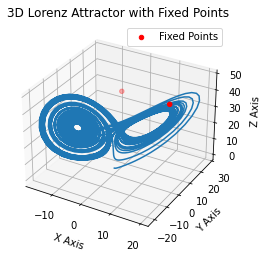

In [14]:
#3 & 4
# 3D plot of Lorenz attractor including fixed points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(solutions[:, 0], solutions[:, 1], solutions[:, 2])
ax.scatter([np.sqrt(params[2]*(params[1]-1)), -np.sqrt(params[2]*(params[1]-1))],
           [params[1]-1, params[1]-1], [params[1]-1, params[1]-1], color='red', label='Fixed Points')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Lorenz Attractor with Fixed Points')
ax.legend()
plt.show()